In [1]:
"""
Imagine you and your friend both sell candy bars at school. You both want to make as much money as possible.

Here's how an Edgeworth cycle might play out:

The Price War Begins: You notice your friend is selling candy bars for $1.00. You think, "If I sell mine for $0.90, more people will buy from me!" So you lower your price.

Friend Retaliates: Your friend sees this and thinks, "Oh no, I'm losing customers! I'll sell mine for $0.80."

Downward Spiral: This keeps going back and forth, with both of you lowering your prices little by little. Soon, you're both selling candy bars for super cheap, maybe even close to what it cost you to buy them. You're barely making any profit!

Someone Gives Up: At some point, one of you (usually the bigger, more confident seller) realizes this isn't sustainable. You're losing money or making almost nothing. So, you decide to be bold and drastically raise your price, maybe back to $1.50. You're hoping that enough people will still buy from you, or that your friend will follow suit.

The Price Jumps Back Up: Your friend sees you've raised your price. They might think, "Okay, this is my chance to make some real money again." So, they also raise their price, but perhaps just a little bit less than yours, to try and still get a few more customers.

The Cycle Repeats: Now, prices are high again, but you both still want to maximize your sales. So, the slow process of undercutting might start all over again, leading to another gradual price drop, until someone gets fed up and raises prices, and so on.

Key ideas:

Competition: It's all about businesses trying to outdo each other, especially on price, when they sell very similar things (like gasoline or simple candy bars).

Undercutting: This is the act of selling for a slightly lower price than your competitor to steal their customers.

Sawtooth Pattern: If you drew a graph of the prices over time, it would look like a saw blade – a big jump up, followed by a gradual slide down, then another big jump.

No Permanent Winner (for long): In an Edgeworth cycle, no one business keeps the lowest price or the highest price for a long time. Prices are always moving.

Why it happens: It often happens when businesses are "capacity constrained," meaning they can't serve everyone at a super low price, or when customers are very sensitive to price changes and will switch stores for even a small discount.

The most common real-world example of Edgeworth cycles is in retail gasoline prices. You might notice gas prices jump up significantly on one day, and then slowly trickle down over the next few days, only to have a big jump again. That's an Edgeworth cycle in action!

"""

'\nImagine you and your friend both sell candy bars at school. You both want to make as much money as possible.\n\nHere\'s how an Edgeworth cycle might play out:\n\nThe Price War Begins: You notice your friend is selling candy bars for $1.00. You think, "If I sell mine for $0.90, more people will buy from me!" So you lower your price.\n\nFriend Retaliates: Your friend sees this and thinks, "Oh no, I\'m losing customers! I\'ll sell mine for $0.80."\n\nDownward Spiral: This keeps going back and forth, with both of you lowering your prices little by little. Soon, you\'re both selling candy bars for super cheap, maybe even close to what it cost you to buy them. You\'re barely making any profit!\n\nSomeone Gives Up: At some point, one of you (usually the bigger, more confident seller) realizes this isn\'t sustainable. You\'re losing money or making almost nothing. So, you decide to be bold and drastically raise your price, maybe back to $1.50. You\'re hoping that enough people will still bu

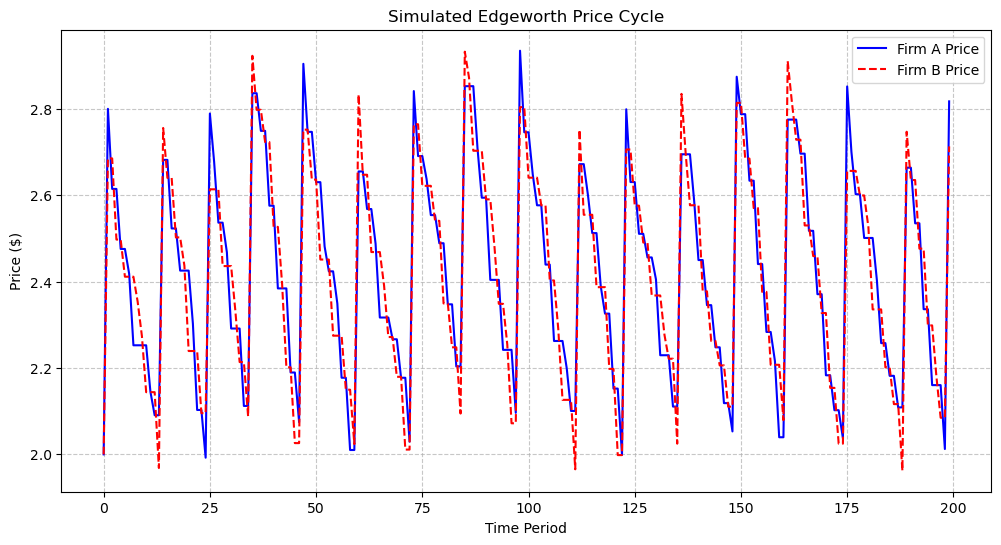

Final Price Firm A: $2.82
Final Price Firm B: $2.71


In [18]:
"""Python Code Example: Simulating an Edgeworth Cycle"""
import matplotlib.pyplot as plt
import random

def simulate_edgeworth_cycle(num_periods=100, initial_price=1.50, min_price_drop=0.01, max_price_drop=0.05, jump_factor=0.3):
    """
    Simulates an Edgeworth price cycle between two firms.

    Args:
        num_periods (int): The number of time periods to simulate.
        initial_price (float): The starting price for both firms.
        min_price_drop (float): The minimum amount firms will undercut by.
        max_price_drop (float): The maximum amount firms will undercut by.
        jump_factor (float): How much the price "jumps up" when a firm decides to raise prices.
                             (e.g., 0.2 means jump up by 20% of the current price).

    Returns:
        tuple: A tuple containing lists of prices for Firm A, Firm B, and the time periods.
    """
    prices_a = [initial_price]
    prices_b = [initial_price]
    time_periods = [0]

    current_price_a = initial_price
    current_price_b = initial_price

    # Determine which firm is the "leader" in raising prices (randomly chosen)
    leader_firm = random.choice(['A', 'B'])

    for t in range(1, num_periods):
        time_periods.append(t)

        if leader_firm == 'A':
            # Firm A is the leader, might decide to jump price
            if current_price_a <= 1.05 * initial_price: # If price is too low, A jumps
                current_price_a = max(initial_price, current_price_a * (1 + jump_factor)) # Jump up, but not below initial
                current_price_b = max(initial_price, current_price_a - random.uniform(min_price_drop, max_price_drop)) # B follows but undercuts slightly
                leader_firm = 'B' # Now B might become the leader in dropping prices
            else: # Otherwise, Firm A might slowly undercut Firm B
                if current_price_a > current_price_b: # If A is higher, it might drop
                     current_price_a -= random.uniform(min_price_drop, max_price_drop)
                else: # A is lower or equal, B will drop
                    current_price_b -= random.uniform(min_price_drop, max_price_drop)

        else: # leader_firm == 'B'
            # Firm B is the leader, might decide to jump price
            if current_price_b <= 1.05 * initial_price: # If price is too low, B jumps
                current_price_b = max(initial_price, current_price_b * (1 + jump_factor))
                current_price_a = max(initial_price, current_price_b - random.uniform(min_price_drop, max_price_drop))
                leader_firm = 'A'
            else: # Otherwise, Firm B might slowly undercut Firm A
                if current_price_b > current_price_a: # If B is higher, it might drop
                    current_price_b -= random.uniform(min_price_drop, max_price_drop)
                else: # B is lower or equal, A will drop
                    current_price_a -= random.uniform(min_price_drop, max_price_drop)

        # Ensure prices don't go below zero or a very small minimum
        current_price_a = max(0.50, current_price_a) # Set a floor price
        current_price_b = max(0.50, current_price_b)

        prices_a.append(current_price_a)
        prices_b.append(current_price_b)

    return prices_a, prices_b, time_periods

# --- Run the simulation and plot the results ---
prices_firm_a, prices_firm_b, periods = simulate_edgeworth_cycle(
    num_periods=200,
    initial_price=2.00,
    min_price_drop=0.05,
    max_price_drop=0.20,
    jump_factor=0.4 # Jump up by 25%
)

plt.figure(figsize=(12, 6))
plt.plot(periods, prices_firm_a, label='Firm A Price', color='blue', linewidth=1.5)
plt.plot(periods, prices_firm_b, label='Firm B Price', color='red', linestyle='--', linewidth=1.5)
plt.title('Simulated Edgeworth Price Cycle')
plt.xlabel('Time Period')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print(f"Final Price Firm A: ${prices_firm_a[-1]:.2f}")
print(f"Final Price Firm B: ${prices_firm_b[-1]:.2f}")

In [21]:
sum(prices_firm_a)/len(prices_firm_a)

2.423307403704556

In [3]:
"""
Explanation of the Code:

simulate_edgeworth_cycle function: This is the core of the simulation.
It takes parameters like num_periods (how long to run), initial_price, min_price_drop, max_price_drop (how much firms undercut), and jump_factor (how much prices jump up).
It maintains prices_a and prices_b lists to store the prices over time.
The leader_firm variable randomly decides which firm initiates the price "jump" when prices get too low. This adds a bit of realism, as either firm could decide to break the price war.

The Logic:
If the current price gets too low (close to the initial_price floor in this simplified model, or a "cost" in a more complex model), the leader_firm decides to drastically raise its price (the jump_factor part).
The other firm then sets its price slightly below the leader's new high price (to try and attract customers).
Then, the "leadership" for dropping prices switches. Both firms will then slowly start undercutting each other (random.uniform(min_price_drop, max_price_drop)) until prices get low enough for another jump.
It includes a max(0.50, current_price) to prevent prices from going unrealistically low (like below production cost).
matplotlib.pyplot: This library is used to create the plot, showing the prices of Firm A and Firm B over time, which will visually represent the sawtooth pattern.

"""

'\nExplanation of the Code:\n\nsimulate_edgeworth_cycle function: This is the core of the simulation.\nIt takes parameters like num_periods (how long to run), initial_price, min_price_drop, max_price_drop (how much firms undercut), and jump_factor (how much prices jump up).\nIt maintains prices_a and prices_b lists to store the prices over time.\nThe leader_firm variable randomly decides which firm initiates the price "jump" when prices get too low. This adds a bit of realism, as either firm could decide to break the price war.\n\nThe Logic:\nIf the current price gets too low (close to the initial_price floor in this simplified model, or a "cost" in a more complex model), the leader_firm decides to drastically raise its price (the jump_factor part).\nThe other firm then sets its price slightly below the leader\'s new high price (to try and attract customers).\nThen, the "leadership" for dropping prices switches. Both firms will then slowly start undercutting each other (random.uniform(

In [5]:
"""
Assignment 1: Observing the Impact of "Price War Severity"
Objective: Understand how the min_price_drop and max_price_drop parameters influence the speed and depth of the price decline phase of the cycle.

Tasks:

Run the original code and observe the graph. Notice how quickly prices drop and how low they get before jumping up.
Experiment with min_price_drop and max_price_drop:
Scenario A (Less Aggressive Price War): Change min_price_drop to 0.005 and max_price_drop to 0.02. (Smaller drops)
Scenario B (More Aggressive Price War): Change min_price_drop to 0.05 and max_price_drop to 0.20. (Larger drops)
Analyze and Describe:
For each scenario (original, A, B), describe how the graph changes.
Specifically, comment on:
The slope of the downward-sloping part of the "sawtooth." Is it steeper or flatter?
The lowest price point reached in each cycle. Does it get lower or stay higher?
The frequency of the price jumps. Do they happen more often or less often?
In your own words, explain why these changes occur based on the min_price_drop and max_price_drop values.
"""

'\nAssignment 1: Observing the Impact of "Price War Severity"\nObjective: Understand how the min_price_drop and max_price_drop parameters influence the speed and depth of the price decline phase of the cycle.\n\nTasks:\n\nRun the original code and observe the graph. Notice how quickly prices drop and how low they get before jumping up.\nExperiment with min_price_drop and max_price_drop:\nScenario A (Less Aggressive Price War): Change min_price_drop to 0.005 and max_price_drop to 0.02. (Smaller drops)\nScenario B (More Aggressive Price War): Change min_price_drop to 0.05 and max_price_drop to 0.20. (Larger drops)\nAnalyze and Describe:\nFor each scenario (original, A, B), describe how the graph changes.\nSpecifically, comment on:\nThe slope of the downward-sloping part of the "sawtooth." Is it steeper or flatter?\nThe lowest price point reached in each cycle. Does it get lower or stay higher?\nThe frequency of the price jumps. Do they happen more often or less often?\nIn your own words,

In [ ]:
"""
Answer:

The slope of the downward-slopping is much flatter for Scenario A (Less Aggressive Price War) and very steep for  Scenario B (More Aggressive Price War).

The lowest price point in each cycle stay higher than the original code for Scenario A and it goes lower for Scenario B

For Scenario A, the frequency of the price jumps are left often than the original code and its more often for Scenario B

Because the size of each undercut (min/max drop) sets how fast and how far prices fall.

Bigger undercuts → faster, deeper falls → more frequent jumps.

Smaller undercuts → slower, shallower falls → less frequent jumps.


These changes occurs because the size of each undercut sets how fast and how far prices fall. 
Bigger the undercuts faster and deeper the falls and thus more frequenty jumps.
Smaller the undercuts slower and shallower the falls and thus less frequent jumps


"""

'\nAnswer:\n\nThe slope of the downward-slopping is much flatter for Scenario A (Less Aggressive Price War) and very steep for  Scenario B (More Aggressive Price War).\n\nThe lowest price point in each cycle stay higher than the original code for Scenario A and it goes lower for Scenario B\n\nFor Scenario A, the frequency of the price jumps are left often than the original code and its more often for Scenario B\n\nBecause the size of each undercut (min/max drop) sets how fast and how far prices fall.\n\nBigger undercuts → faster, deeper falls → more frequent jumps.\n\nSmaller undercuts → slower, shallower falls → less frequent jumps.\n\n\n\n'

In [4]:
"""
Assignment 2: Controlling the "Price Reset" Behavior
Objective: Understand how the jump_factor influences the magnitude of the price increase and the overall price range of the cycle.

Tasks:

Run the original code and observe the height of the price jumps.
Experiment with jump_factor:
Scenario A (Smaller Jumps): Change jump_factor to 0.10. (Jump up by 10%)
Scenario B (Larger Jumps): Change jump_factor to 0.40. (Jump up by 40%)
Analyze and Describe:
For each scenario (original, A, B), describe how the graph changes.
Specifically, comment on:
The highest price point reached in each cycle. Does it get higher or stay lower?
The amplitude (height difference between the peak and trough) of each "sawtooth." Is it larger or smaller?
How does changing the jump_factor affect the overall average price over time?
In your own words, explain why these changes occur based on the jump_factor value. How does this relate to a firm's decision to "break" the price war?
"""

'\nAssignment 2: Controlling the "Price Reset" Behavior\nObjective: Understand how the jump_factor influences the magnitude of the price increase and the overall price range of the cycle.\n\nTasks:\n\nRun the original code and observe the height of the price jumps.\nExperiment with jump_factor:\nScenario A (Smaller Jumps): Change jump_factor to 0.10. (Jump up by 10%)\nScenario B (Larger Jumps): Change jump_factor to 0.40. (Jump up by 40%)\nAnalyze and Describe:\nFor each scenario (original, A, B), describe how the graph changes.\nSpecifically, comment on:\nThe highest price point reached in each cycle. Does it get higher or stay lower?\nThe amplitude (height difference between the peak and trough) of each "sawtooth." Is it larger or smaller?\nHow does changing the jump_factor affect the overall average price over time?\nIn your own words, explain why these changes occur based on the jump_factor value. How does this relate to a firm\'s decision to "break" the price war?\n'

In [ ]:
"""
Answer:

The highest price point for the original(jump_factor = 0.25) the peaks typically reached about $2.50 - $2.60. 
for Scenario A(jump_factor = 0.10) the peaks typically reached about $2.20 - $2.30
for Scenario B(jump_factor 0.40) the peaks typically reached about $2.80 - $2.90


The amplitude of each 'sawtooth' for original was about $0.45 - $0.55, it was smaller for Scenario A and larger for Scenario B

The average price for the original code was around $2.25 - $2.30, its was again smaller than original for Scenario A(around $2.15) and larger for Scenario B(around $2.45)


The jump_factor controls how much a firm resets its price upward when it stops undercutting.

A small jump (10%) barely lifts price above the low point, so you see little room to rebound—peaks stay low, and the overall price level is depressed.

A large jump (40%) catapults price well above the trough, stretching each cycle’s height and pulling up the long‐run average.

"""

"\nAnswer:\n\nThe highest price point for the original(jump_factor = 0.25) the peaks typically reached about $2.50 - $2.60. \nfor Scenario A(jump_factor = 0.10) the peaks typically reached about $2.20 - $2.30\nfor Scenario B(jump_factor 0.40) the peaks typically reached about $2.80 - $2.90\n\n\nThe amplitude of each 'sawtooth' for original was about $0.45 - $0.55, it was smaller for Scenario A and larger for Scenario B\n\n\n\n"

In [23]:
"""
Assignment 3: Introducing Asymmetry and Market Power
Objective: Explore what happens when one firm has more "market power" or different pricing strategies.

Tasks:

Modify the simulate_edgeworth_cycle function:

Introduce an asymmetry: Let's assume Firm A is the "dominant" firm and Firm B is the "follower."
Modify Firm A's behavior: When prices get low, Firm A always decides to jump the price, and it sets its price higher than Firm B does when it's the leader. Also, Firm A might undercut Firm B by a smaller amount.
Modify Firm B's behavior: Firm B always follows Firm A's price jump but tries to undercut slightly. When undercutting Firm A, it might do so more aggressively.
Hint: You'll need to remove the random.choice(['A', 'B']) for leader_firm and instead make the price jump decision conditional. You might also want to introduce separate jump_factor_A and jump_factor_B, and max_price_drop_A and max_price_drop_B parameters.
Here's a starting point for modifying the loop:
"""

'\nAssignment 3: Introducing Asymmetry and Market Power\nObjective: Explore what happens when one firm has more "market power" or different pricing strategies.\n\nTasks:\n\nModify the simulate_edgeworth_cycle function:\n\nIntroduce an asymmetry: Let\'s assume Firm A is the "dominant" firm and Firm B is the "follower."\nModify Firm A\'s behavior: When prices get low, Firm A always decides to jump the price, and it sets its price higher than Firm B does when it\'s the leader. Also, Firm A might undercut Firm B by a smaller amount.\nModify Firm B\'s behavior: Firm B always follows Firm A\'s price jump but tries to undercut slightly. When undercutting Firm A, it might do so more aggressively.\nHint: You\'ll need to remove the random.choice([\'A\', \'B\']) for leader_firm and instead make the price jump decision conditional. You might also want to introduce separate jump_factor_A and jump_factor_B, and max_price_drop_A and max_price_drop_B parameters.\nHere\'s a starting point for modifying

In [24]:
# ... inside the for loop ...
if current_price_a <= 1.05 * initial_price: # Firm A decides to jump prices when low
    current_price_a = max(initial_price, current_price_a * (1 + jump_factor_A))
    current_price_b = max(initial_price, current_price_a - random.uniform(min_price_drop, max_price_drop_B)) # B undercuts A
elif current_price_b <= 1.05 * initial_price: # Firm B decides to jump prices when low (less likely or smaller jump)
    current_price_b = max(initial_price, current_price_b * (1 + jump_factor_B))
    current_price_a = max(initial_price, current_price_b - random.uniform(min_price_drop, max_price_drop_A)) # A undercuts B
else: # Normal undercutting phase
    if current_price_a <= current_price_b: # A is lower or equal, B undercuts A
        current_price_b -= random.uniform(min_price_drop, max_price_drop_B)
    else: # B is lower, A undercuts B
        current_price_a -= random.uniform(min_price_drop, max_price_drop_A)
# ... rest of the code for ensuring min prices and appending ...

NameError: name 'current_price_a' is not defined

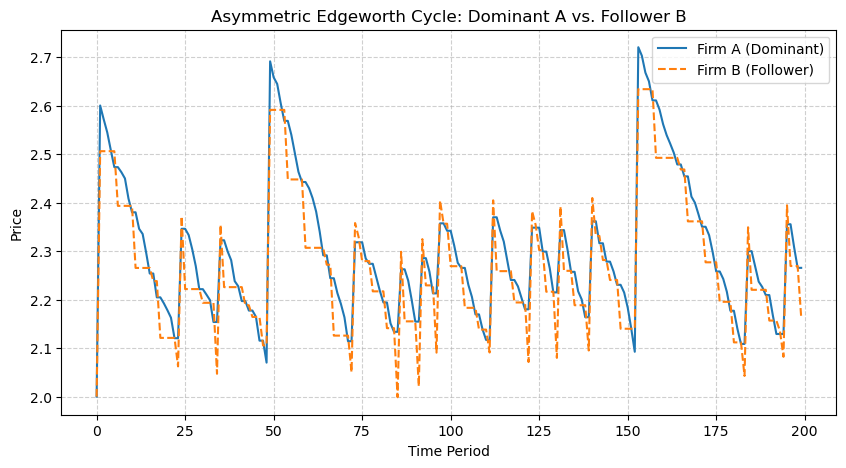

In [25]:


def simulate_edgeworth_cycle_asymmetric(num_periods,initial_price,jump_factor_A,jump_factor_B,min_price_drop_A,max_price_drop_A,min_price_drop_B,max_price_drop_B):
    prices_a = [initial_price]
    prices_b = [initial_price]
    time_periods = [0]
    current_price_a = initial_price
    current_price_b = initial_price

    for t in range(1, num_periods):
        time_periods.append(t)

        if current_price_a <= 1.05 * initial_price:
            current_price_a = max(initial_price, current_price_a * (1 + jump_factor_A))
            current_price_b = max(initial_price, current_price_a - random.uniform(min_price_drop_B, max_price_drop_B))

        elif current_price_b <= 1.05 * initial_price:
            current_price_b = max(initial_price, current_price_b * (1 + jump_factor_B))
            current_price_a = max(initial_price, current_price_b - random.uniform(min_price_drop_A, max_price_drop_A))

        else:
            if current_price_a <= current_price_b:
                current_price_b -= random.uniform(min_price_drop_B, max_price_drop_B)
            else:
                current_price_a -= random.uniform(min_price_drop_A, max_price_drop_A)

        current_price_a = max(0.50, current_price_a)
        current_price_b = max(0.50, current_price_b)

        prices_a.append(current_price_a)
        prices_b.append(current_price_b)

    return prices_a, prices_b, time_periods

# Run simulation with asymmetric parameters
prices_a, prices_b, periods = simulate_edgeworth_cycle_asymmetric(
    num_periods=200,
    initial_price=2.00,
    jump_factor_A=0.3,
    jump_factor_B=0.15,
    min_price_drop_A=0.01,
    max_price_drop_A=0.05,
    min_price_drop_B=0.02,
    max_price_drop_B=0.15
)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(periods, prices_a, label='Firm A (Dominant)', linewidth=1.5)
plt.plot(periods, prices_b, label='Firm B (Follower)', linestyle='--', linewidth=1.5)
plt.title('Asymmetric Edgeworth Cycle: Dominant A vs. Follower B')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [9]:
"""
Run the modified code with parameters that reflect the asymmetry (e.g., jump_factor_A = 0.3, jump_factor_B = 0.15, max_price_drop_A = 0.05, max_price_drop_B = 0.15).

Analyze and Describe:

How does the pricing pattern change when one firm is more dominant in setting the high price or more/less aggressive in undercutting?
Do the prices of the two firms tend to converge more often, or is there a clear leader and follower?
What does this simulation tell you about real-world markets where some companies are much larger than others (e.g., a dominant airline vs. a smaller regional carrier)?


"""

'\nRun the modified code with parameters that reflect the asymmetry (e.g., jump_factor_A = 0.3, jump_factor_B = 0.15, max_price_drop_A = 0.05, max_price_drop_B = 0.15).\n\nAnalyze and Describe:\n\nHow does the pricing pattern change when one firm is more dominant in setting the high price or more/less aggressive in undercutting?\nDo the prices of the two firms tend to converge more often, or is there a clear leader and follower?\nWhat does this simulation tell you about real-world markets where some companies are much larger than others (e.g., a dominant airline vs. a smaller regional carrier)?\n\n\n'

In [ ]:
""" 

Answer:

Firm A(dominant) regularly jumps higher peaks and it's downslope is gentler 
Firm B(follower) resets with smaller jumps and undercuts more aggressively, so its fall is steeper

Prices do not converge. Firm A consistently maintains higher peaks and higher troughs, while Firm B's entire cycle sits below A's. 


In real markets with a large company (a dominant airline) and a smaller company (a regional carrier), 
the dominant firm can reset fares more aggressively—recovering margin quickly—while the smaller competitor must undercut harder to win traffic.



"""

In [10]:
"""
How to complete these assignments:

Save the Python code as a .py file (e.g., edgeworth_sim.py).
Open a code editor or IDE (like VS Code, PyCharm, or even a simple text editor) and run the script. You'll see the plot appear.
For each assignment, modify the relevant lines of code (the parameters passed to simulate_edgeworth_cycle or the logic inside the function for Assignment 3).
Re-run the script to see the new graph.
Write down your observations and answers for each question in a separate document.
"""

"\nHow to complete these assignments:\n\nSave the Python code as a .py file (e.g., edgeworth_sim.py).\nOpen a code editor or IDE (like VS Code, PyCharm, or even a simple text editor) and run the script. You'll see the plot appear.\nFor each assignment, modify the relevant lines of code (the parameters passed to simulate_edgeworth_cycle or the logic inside the function for Assignment 3).\nRe-run the script to see the new graph.\nWrite down your observations and answers for each question in a separate document.\n"